<a href="https://colab.research.google.com/github/remziyeer/CLUSTERING/blob/main/spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
X=pd.read_csv("Iris.csv")
#Alakasız sütunları silmek
drop_features = ['Id', 'Species']
X = X.drop(drop_features, axis = 1)
# Varsa eksik değerlerin işlenmesi
X.fillna(method ='ffill', inplace = True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris.data.shape

(150, 4)

#Verileri görselleştirilebilir hale getirmek için verileri ön işleme

**Verileri Ölçeklendirme**

Standardizasyon işleminde her bir sütundaki gözlem birimi ortalamadan çıkarılır ve standart sapmaya bölünür. Böylelikle değişkenler ortalaması 0 varyansı 1 olan normal dağılım aralığına getirilmiş olur. Ancak bu yöntem verinin normal dağıldığı varsayımına dayanır işleme geçmeden önce bu varsayımı kontrol etmeliyiz.  Standardizasyon ölçeklendirmesi veride bir bilgi kaybına/değişimine neden olmaz yalnızca değişkenleri belirli bir standarda taşımış olur. Bu dönüşümden sonra değişkenler [-1,1] arasında değerler alırlar.

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Verileri normalleştirme** 
Böylece veriler yaklaşık olarak bir Gauss dağılımını takip eder

Normalizasyon işleminde bilmemiz gereken nokta dönüşümün sütun bazında değiş satır bazında olduğudur. Normalizasyon işleminde verinin varyansını, ortalamasını ve dağılımını değiştirmez. Bu işlemden sonra veriler [0,1] arasında değer alırlar.



In [18]:
X_normalized = normalize(X_scaled)

Numpy dizisini bir pandas DataFrame'e dönüştürme



In [19]:
X_normalized = pd.DataFrame(X_normalized)

Sütunları yeniden adlandırma


In [20]:
X_normalized.columns = X.columns
  
X_normalized.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.387617,0.444156,-0.577230,-0.565052
1,-0.519284,-0.056769,-0.609353,-0.596498
2,-0.579648,0.141360,-0.584998,-0.549365
3,-0.633543,0.044764,-0.540137,-0.552152
4,-0.411600,0.508921,-0.540264,-0.528866


Verilerin boyutlarını küçültme


---
Toplam dataset 4 feature’a sahip. Şimdi bu boyutları nasıl azaltabileceğimizi değerlendirelim. Mesela 2 boyuta indirelim.


In [21]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) #boyut azaltma uygulama 
X_principal = pd.DataFrame(X_principal) #Numpy dizisini bir pandas DataFrame'e dönüştürme
X_principal.columns = ['P1', 'P2']

X_principal

,P1,P2
0,1.121912,-0.267905
1,1.080949,0.242703
2,1.126191,0.084878
3,1.100280,0.194962
4,1.109817,-0.319559
...,...,...
145,-0.804754,-0.308406
146,-0.730574,0.385791
147,-0.830357,-0.280716
148,-0.557988,-0.609208


#Kümeleme modellerini oluşturma ve kümelemeyi görselleştirme

Kümeleme modelini oluşturma

In [23]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')


Modeli eğitme ve tahmin edilen küme label leri depolama

In [24]:
labels_rbf = spectral_model_rbf.fit_predict(X_principal)


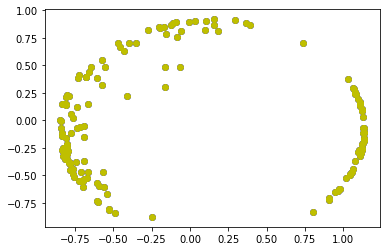

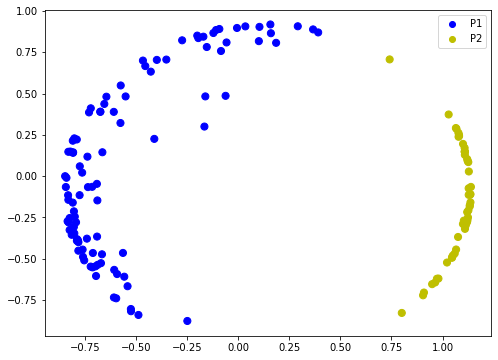

In [33]:
# Renk eşleme için etiket oluşturma
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Her veri noktası için renk vektörünün oluşturulması
cvec = [colours[label] for label in labels_rbf]
  
# Kümeleme dağılım grafiğini çizme  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(8,6)) #Grafiğin boyutunu belirler. Parantez içindeki ilk yazılan değer grafiğin eni, ikincisi boyudur.
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec, s=50) # c, yuvarlakların rengini belirler. s, yuvarlakların boyutunu belirler.
plt.legend((b, y), ('P1', 'P2')) # Grafik elemanları adlandırdığımız etiketleri grafikte gösterir.
plt.show()

In [ ]:
# Kümeleme modelini oluşturma
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
#Modeli eğitme ve tahmin edilen küme etiketlerini depolama
labels_nn = spectral_model_nn.fit_predict(X_principal)

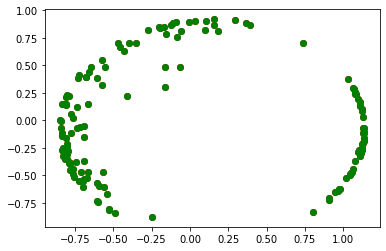

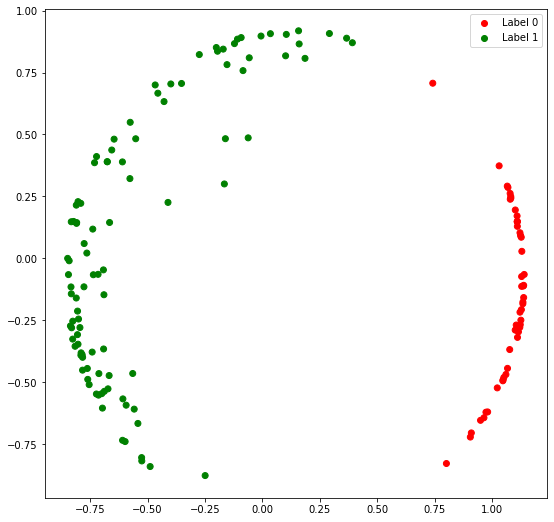

In [ ]:

# Renk eşleme için etiket oluşturma
colours = {}
colours[0] = 'r'
colours[1] = 'g'
  
# Her veri noktası için renk vektörünün oluşturulması
cvec = [colours[label] for label in labels_nn]
  
# Kümeleme dağılım grafiğini çizme  
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

#Performansların değerlendirilmesi

In [ ]:
# Farklı yakınlık değerlerinin listesi
affinity = ['rbf', 'nearest-neighbours']
  
#Silhouette Scores Listesi
s_scores = []
  
# Performansı değerlendirme
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
  
print(s_scores)

[0.6863930543445408, 0.6863930543445408]


#Performansların karşılaştırılması

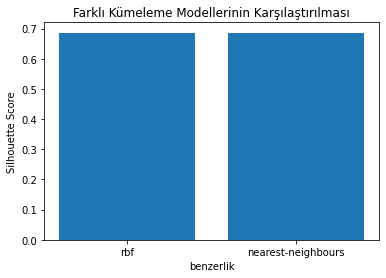

In [ ]:
# Modelleri karşılaştırmak için bir Çubuk Grafik çizme
plt.bar(affinity, s_scores)
plt.xlabel('benzerlik')
plt.ylabel('Silhouette Score')
plt.title('Farklı Kümeleme Modellerinin Karşılaştırılması')
plt.show()